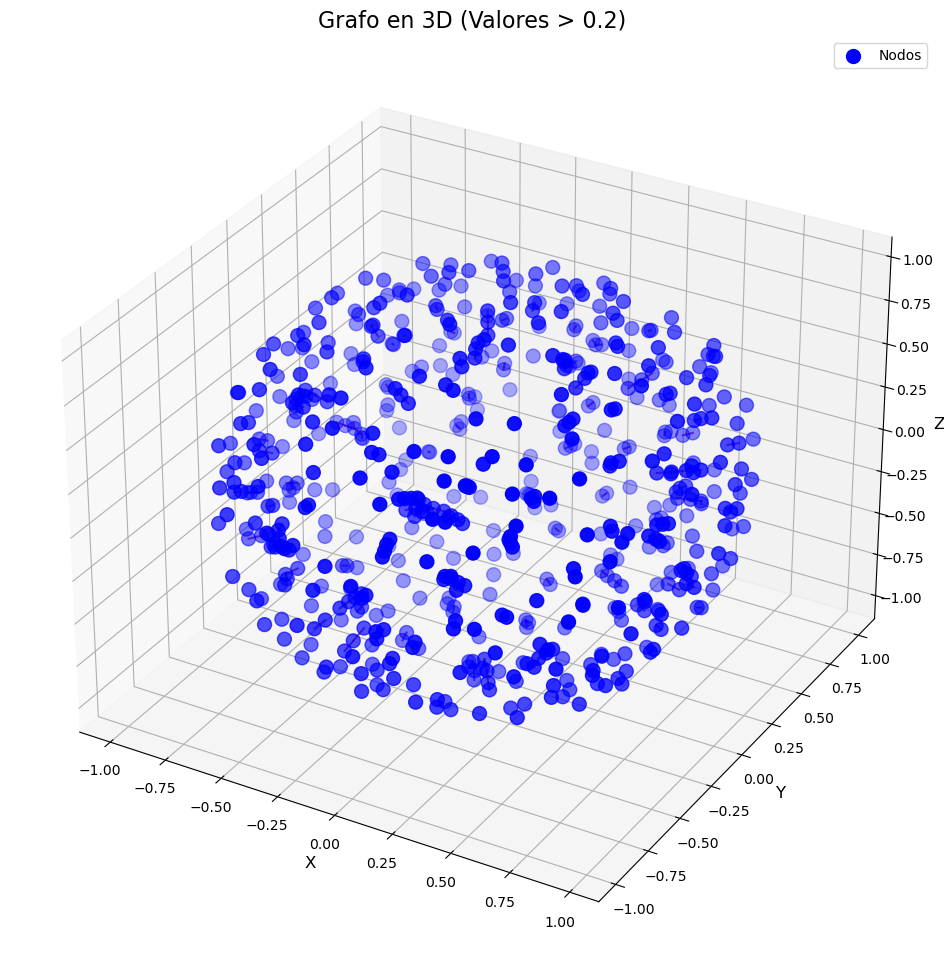

In [15]:
import scipy.io
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
import numpy as np

file_path = r"/Users/sabrina/Documents/UNI/A-NEUROCIENCIAS/QUINTO /MODELOS/Neurociencias-2025-1/BCT/BCT/2019_03_03_BCT/data_and_demos/Coactivation_matrix.mat"
mat = scipy.io.loadmat(file_path)
matrix = mat['Coactivation_matrix']

filt_mat = np.where(matrix > 0.2, matrix, 0)

graph = nx.from_numpy_matrix(filt_mat)

pos_3d = nx.spring_layout(graph, dim=3, seed=42)  

x = [pos[0] for pos in pos_3d.values()]
y = [pos[1] for pos in pos_3d.values()]
z = [pos[2] for pos in pos_3d.values()]

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(x, y, z, s=100, c="blue", label="Nodos")

for edge in graph.edges():
    x_coords = [pos_3d[edge[0]][0], pos_3d[edge[1]][0]]
    y_coords = [pos_3d[edge[0]][1], pos_3d[edge[1]][1]]
    z_coords = [pos_3d[edge[0]][2], pos_3d[edge[1]][2]]
    ax.plot(x_coords, y_coords, z_coords, c="purple", alpha=0.7)

ax.set_title("Grafo en 3D (Valores > 0.2)", fontsize=16)
ax.set_xlabel("X", fontsize=12)
ax.set_ylabel("Y", fontsize=12)
ax.set_zlabel("Z", fontsize=12)
ax.legend()
plt.show()
